## Sleep Pattern Analysis 
### *Business Problem*
- How can we identify the key factors that affect sleep quality and duration to help people improve their sleep and overall health?
- Healthcare  companies (recommended sleep improvements plans)
- Fitness/wellness apps (eg - Fitbit, WHOOP)
- Insurance Providers (assessing health risk)

### *Project Objective*
*To analyse sleep data to discover patterns and relationships between sleep quality and factors such as scrren time, exercise, caffine intake, stress levels and lifestyle habits.*

### *Project Overview*
This Project aims to perform an end to end data analytics process using the Sleep Patterns Dataset. The key steps include:
- Cleaning and preparing the data
- Performing exploratory data analysis (EDA)
- Identifying significant factors influencing sleep duration and quality
- Generating insights that could support health and wellness recommendations

### *Import the Libraries*

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings 
warnings.filterwarnings("ignore")

### *Data Exploration*

In [3]:
df = pd.read_csv("sleep_data.csv")

In [4]:
df.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.530000,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


In [5]:
df.columns.tolist()

['age',
 'black',
 'case',
 'clerical',
 'construc',
 'educ',
 'earns74',
 'gdhlth',
 'inlf',
 'leis1',
 'leis2',
 'leis3',
 'smsa',
 'lhrwage',
 'lothinc',
 'male',
 'marr',
 'prot',
 'rlxall',
 'selfe',
 'sleep',
 'slpnaps',
 'south',
 'spsepay',
 'spwrk75',
 'totwrk',
 'union',
 'worknrm',
 'workscnd',
 'exper',
 'yngkid',
 'yrsmarr',
 'hrwage',
 'agesq']

In [6]:
df.shape

(706, 34)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       706 non-null    int64  
 1   black     706 non-null    int64  
 2   case      706 non-null    int64  
 3   clerical  706 non-null    float64
 4   construc  706 non-null    float64
 5   educ      706 non-null    int64  
 6   earns74   706 non-null    int64  
 7   gdhlth    706 non-null    int64  
 8   inlf      706 non-null    int64  
 9   leis1     706 non-null    int64  
 10  leis2     706 non-null    int64  
 11  leis3     706 non-null    int64  
 12  smsa      706 non-null    int64  
 13  lhrwage   532 non-null    float64
 14  lothinc   706 non-null    float64
 15  male      706 non-null    int64  
 16  marr      706 non-null    int64  
 17  prot      706 non-null    int64  
 18  rlxall    706 non-null    int64  
 19  selfe     706 non-null    int64  
 20  sleep     706 non-null    int64 

In [8]:
df.describe()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,...,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,532.000000,706.000000
mean,38.815864,0.049575,353.500000,0.182331,0.030075,12.780453,9767.705382,0.890935,0.753541,4690.723796,...,0.480170,2122.920680,0.218130,2093.252125,29.668555,20.035411,0.128895,11.769122,5.082839,1635.144476
std,11.342637,0.217219,203.948932,0.335413,0.148366,2.784702,9323.588151,0.311942,0.431254,908.049561,...,0.499961,947.470123,0.413269,945.301457,148.834262,12.377520,0.335321,11.591227,3.704385,950.102976
min,23.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1745.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,529.000000
25%,29.000000,0.000000,177.250000,0.000000,0.000000,12.000000,2500.000000,1.000000,1.000000,4109.750000,...,0.000000,1553.500000,0.000000,1538.000000,0.000000,10.000000,0.000000,0.000000,2.890002,841.000000
50%,36.000000,0.000000,353.500000,0.000000,0.000000,12.000000,8250.000000,1.000000,1.000000,4620.000000,...,0.000000,2288.000000,0.000000,2275.000000,0.000000,17.000000,0.000000,9.000000,4.380000,1296.000000
75%,48.000000,0.000000,529.750000,0.182331,0.030075,16.000000,13750.000000,1.000000,1.000000,5203.750000,...,1.000000,2691.750000,0.000000,2635.500000,0.000000,30.000000,0.000000,20.000000,6.210001,2304.000000
max,65.000000,1.000000,706.000000,1.000000,1.000000,17.000000,42500.000000,1.000000,1.000000,7417.000000,...,1.000000,6415.000000,1.000000,6415.000000,1337.000000,55.000000,1.000000,43.000000,35.509990,4225.000000


In [9]:
df.isna().sum()

age           0
black         0
case          0
clerical      0
construc      0
educ          0
earns74       0
gdhlth        0
inlf          0
leis1         0
leis2         0
leis3         0
smsa          0
lhrwage     174
lothinc       0
male          0
marr          0
prot          0
rlxall        0
selfe         0
sleep         0
slpnaps       0
south         0
spsepay       0
spwrk75       0
totwrk        0
union         0
worknrm       0
workscnd      0
exper         0
yngkid        0
yrsmarr       0
hrwage      174
agesq         0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df["age"].nunique()

43

In [12]:
df["age"].value_counts()

age
28    36
32    33
33    31
27    27
26    26
24    26
29    26
44    26
25    25
31    24
35    23
30    22
23    22
39    21
36    20
50    18
34    18
37    18
52    17
40    16
54    16
56    15
47    15
38    14
49    13
45    12
46    12
42    12
51    12
43    11
53    10
48    10
60    10
58     9
59     9
55     9
41     9
62     8
57     8
61     6
64     6
65     3
63     2
Name: count, dtype: int64

In [13]:
df["black"].nunique()

2

In [14]:
df["black"].value_counts()

black
0    671
1     35
Name: count, dtype: int64

In [15]:
df["case"].nunique()

706

In [16]:
df["case"].value_counts()

case
1      1
530    1
466    1
467    1
468    1
      ..
238    1
239    1
240    1
241    1
706    1
Name: count, Length: 706, dtype: int64

In [17]:
df["clerical"].nunique()

3

In [18]:
df["clerical"].value_counts()

clerical
0.000000    435
0.182331    174
1.000000     97
Name: count, dtype: int64

In [19]:
df["construc"].nunique()

3

In [20]:
df["construc"].value_counts()

construc
0.000000    516
0.030075    174
1.000000     16
Name: count, dtype: int64

In [21]:
df["educ"].nunique()

15

In [22]:
df["educ"].value_counts()

educ
12    282
16     96
17     84
14     49
8      38
10     34
13     32
11     31
15     20
9      19
5       8
7       6
6       5
4       1
1       1
Name: count, dtype: int64

In [23]:
df["earns74"].nunique()

19

In [24]:
df["earns74"].value_counts()

earns74
0        110
13750     80
6750      55
8250      50
16250     46
1000      41
9500      40
10500     37
2500      34
4500      33
5500      32
11750     31
18750     30
42500     25
3500      24
21250     15
27500     10
32500      8
23750      5
Name: count, dtype: int64

In [25]:
df["gdhlth"].nunique()

2

In [26]:
df["gdhlth"].value_counts()

gdhlth
1    629
0     77
Name: count, dtype: int64

In [27]:
df["inlf"].nunique()

2

In [28]:
df["inlf"].value_counts()

inlf
1    532
0    174
Name: count, dtype: int64

In [29]:
df["leis1"].nunique()

590

In [30]:
df["leis1"].value_counts()

leis1
5387    3
4904    3
4112    3
4509    3
4594    3
       ..
4429    1
6630    1
5666    1
4382    1
4747    1
Name: count, Length: 590, dtype: int64

In [31]:
df["leis2"].nunique()

601

In [32]:
df["leis2"].value_counts()

leis2
4012    4
4302    4
4690    3
5747    3
3774    3
       ..
4723    1
6520    1
4754    1
3132    1
5119    1
Name: count, Length: 601, dtype: int64

In [33]:
df["leis3"].nunique()

595

In [34]:
df["leis3"].value_counts()

leis3
4432    4
4519    4
3479    3
3739    3
4239    3
       ..
3852    1
3184    1
5100    1
4869    1
5031    1
Name: count, Length: 595, dtype: int64

In [35]:
df["smsa"].nunique()

2

In [36]:
df["smsa"].value_counts()

smsa
0    424
1    282
Name: count, dtype: int64

In [37]:
df["lhrwage"].nunique()

252

In [38]:
df["lhrwage"].value_counts()

lhrwage
1.752672    28
1.530395    22
1.241269    18
0.837247    17
1.061257    13
            ..
1.574847     1
1.169381     1
1.688249     1
1.776646     1
3.139400     1
Name: count, Length: 252, dtype: int64

In [39]:
df["lothinc"].nunique()

73

In [40]:
df["lothinc"].value_counts()

lothinc
0.000000     218
8.517393      32
9.528867      29
7.824446      27
8.922792      21
            ... 
9.047939       1
9.998843       1
8.294300       1
10.441470      1
9.615872       1
Name: count, Length: 73, dtype: int64

In [41]:
df["male"].nunique()

2

In [42]:
df["male"].value_counts()

male
1    400
0    306
Name: count, dtype: int64

In [43]:
df["marr"].nunique()

2

In [44]:
df["marr"].value_counts()

marr
1    580
0    126
Name: count, dtype: int64

In [45]:
df["prot"].nunique()

2

In [46]:
df["prot"].value_counts()

prot
1    468
0    238
Name: count, dtype: int64

In [47]:
df["rlxall"].nunique()

511

In [48]:
df["rlxall"].value_counts()

rlxall
3533    5
3270    5
3298    5
3278    4
3730    4
       ..
3115    1
3439    1
3699    1
3433    1
3415    1
Name: count, Length: 511, dtype: int64

In [49]:
df["selfe"].nunique()

2

In [50]:
df["selfe"].value_counts()

selfe
0    613
1     93
Name: count, dtype: int64

In [51]:
df["sleep"].nunique()

449

In [52]:
df["sleep"].value_counts()

sleep
2985    6
3405    6
3308    6
3218    6
3150    6
       ..
3778    1
3825    1
3108    1
3965    1
3510    1
Name: count, Length: 449, dtype: int64

In [53]:
df["slpnaps"].nunique()

490

In [54]:
df["slpnaps"].value_counts()

slpnaps
3390    5
3330    5
3278    5
3650    4
3203    4
       ..
3586    1
3653    1
3433    1
3191    1
3000    1
Name: count, Length: 490, dtype: int64

In [55]:
df["south"].nunique()

2

In [56]:
df["south"].value_counts()

south
0    576
1    130
Name: count, dtype: int64

In [57]:
df["spsepay"].nunique()

109

In [58]:
df["spsepay"].value_counts()

spsepay
0        367
12000     20
6000      16
11000     13
9000      13
        ... 
5600       1
10500      1
7950       1
4750       1
17500      1
Name: count, Length: 109, dtype: int64

In [59]:
df["spwrk75"].nunique()

2

In [60]:
df["spwrk75"].value_counts()

spwrk75
0    367
1    339
Name: count, dtype: int64

In [61]:
df["totwrk"].nunique()

476

In [62]:
df["totwrk"].value_counts()

totwrk
0       30
2250     8
2300     7
2100     7
2163     6
        ..
1075     1
2743     1
2592     1
2140     1
1961     1
Name: count, Length: 476, dtype: int64

In [63]:
df["union"].nunique()

2

In [64]:
df["union"].value_counts()

union
0    552
1    154
Name: count, dtype: int64

In [65]:
df["workscnd"].nunique()

37

In [66]:
df["workscnd"].value_counts()

workscnd
0       659
375       3
75        3
210       2
60        2
50        2
1050      2
600       2
630       2
480       2
825       1
1190      1
2         1
63        1
1138      1
40        1
300       1
925       1
450       1
308       1
117       1
1063      1
150       1
238       1
218       1
55        1
900       1
1337      1
1205      1
390       1
875       1
405       1
233       1
38        1
350       1
538       1
83        1
Name: count, dtype: int64

In [67]:
df["exper"].nunique()

53

In [68]:
df["exper"].value_counts()

exper
10    40
14    29
17    28
8     26
11    25
6     25
5     24
7     23
13    23
31    21
18    21
9     20
22    20
12    19
29    19
21    17
34    17
32    16
16    15
2     14
26    14
19    14
15    14
36    14
37    13
23    13
20    13
25    12
30    12
4     11
39    10
1     10
24    10
35     9
38     8
3      8
42     8
33     8
41     8
40     7
27     7
44     7
43     7
28     6
48     5
46     4
45     3
47     3
52     2
0      1
55     1
54     1
49     1
Name: count, dtype: int64

In [69]:
df["yngkid"].nunique()

2

In [70]:
df["yngkid"].value_counts()

yngkid
0    615
1     91
Name: count, dtype: int64

In [71]:
df["yrsmarr"].nunique()

43

In [72]:
df["yrsmarr"].value_counts()

yrsmarr
0     191
4      32
5      29
9      25
7      24
22     20
10     20
2      19
14     18
18     18
6      17
16     17
17     16
8      15
15     15
12     14
27     14
13     13
3      13
19     13
24     12
26     11
23     10
29     10
1      10
30      9
11      9
28      9
25      9
20      8
32      8
35      8
36      7
31      6
38      6
34      6
37      5
39      5
33      5
21      4
42      2
41      2
43      2
Name: count, dtype: int64

In [73]:
df["hrwage"].nunique()

252

In [74]:
df["hrwage"].value_counts()

hrwage
5.770000     28
4.620001     22
3.460001     18
2.309999     17
2.890002     13
             ..
4.830002      1
3.219999      1
5.409999      1
5.910001      1
23.090010     1
Name: count, Length: 252, dtype: int64

In [75]:
df["agesq"].nunique()

43

In [76]:
df["agesq"].value_counts()

agesq
784     36
1024    33
1089    31
729     27
676     26
576     26
841     26
1936    26
625     25
961     24
1225    23
900     22
529     22
1521    21
1296    20
2500    18
1156    18
1369    18
2704    17
1600    16
2916    16
3136    15
2209    15
1444    14
2401    13
2025    12
2116    12
1764    12
2601    12
1849    11
2809    10
2304    10
3600    10
3364     9
3481     9
3025     9
1681     9
3844     8
3249     8
3721     6
4096     6
4225     3
3969     2
Name: count, dtype: int64

### *Data Cleaning*

**Rename all the necessary columns**

In [77]:
df.rename(columns={'leis3': 'total_leisure_time'}, inplace=True)
df.rename(columns={'gdhlth': 'good_health'}, inplace=True)
df.rename(columns={'educ': 'education'}, inplace=True)
df.rename(columns={'prot': 'Protestant'}, inplace=True)
df.rename(columns={'marr': 'Marital_status'}, inplace=True)
df.rename(columns={'spwrk75': 'spouse_works'}, inplace=True)
df.rename(columns={'lhrwage': 'log_hr_wage'}, inplace=True)
df.rename(columns={'lothinc': 'log_other_income'}, inplace=True)
df.rename(columns={'spsepay': 'spouse_income'}, inplace=True)
df.rename(columns={'totwrk': 'totwrk_hr'}, inplace=True)
df.rename(columns={'yngkid': 'young_kid'}, inplace=True)
df.rename(columns={'yrsmarr': 'years_married'}, inplace=True)
df.rename(columns={'hrwage': 'hourly_wage'}, inplace=True)
df.rename(columns={'agesq': 'age_squared'}, inplace=True)
df.rename(columns={'exper': 'experience'}, inplace=True)
df.rename(columns={'workscnd': 'Worked_second'}, inplace=True)

In [78]:
df['totwrk_hr'] = df['totwrk_hr'] / 60  # Convert minutes to hours
# df['Worked_second'] = df['Worked_second'] / 60

In [79]:
df.drop(columns=['leis1', 'leis2','case'], inplace=True)

In [95]:
df.columns.tolist()

['age',
 'black',
 'clerical',
 'construc',
 'education',
 'earns74',
 'good_health',
 'inlf',
 'total_leisure_time',
 'smsa',
 'log_hr_wage',
 'log_other_income',
 'male',
 'Marital_status',
 'Protestant',
 'rlxall',
 'selfe',
 'sleep',
 'slpnaps',
 'south',
 'spouse_income',
 'spouse_works',
 'totwrk_hr',
 'union',
 'worknrm',
 'Worked_second',
 'experience',
 'young_kid',
 'years_married',
 'hourly_wage',
 'age_squared']

In [81]:
df['black'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['good_health'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['inlf'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['male'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['Marital_status'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['selfe'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['south'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['spouse_works'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['spouse_works'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['worknrm'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['young_kid'].replace({0: 'No', 1: 'Yes'}, inplace=True) 

In [82]:
df['clerical'] = df['clerical'].round().astype(int)

In [83]:
df.head()

,age,black,clerical,construc,education,earns74,good_health,inlf,total_leisure_time,smsa,...,spouse_works,totwrk_hr,union,worknrm,Worked_second,experience,young_kid,years_married,hourly_wage,age_squared
0,32,No,0,0.0,12,0,No,Yes,3479,0,...,No,57.300000,0,3438,0,14,No,13,7.070004,1024
1,31,No,0,0.0,14,9500,Yes,Yes,2140,0,...,No,83.666667,0,5020,0,11,No,0,1.429999,961
2,44,No,0,0.0,17,42500,Yes,Yes,4227,1,...,Yes,46.916667,0,2815,0,21,No,0,20.530000,1936
3,30,No,0,0.0,12,42500,Yes,Yes,3211,0,...,Yes,63.100000,0,3786,0,12,No,12,9.619998,900
4,64,No,0,0.0,14,2500,Yes,Yes,4007,0,...,Yes,43.000000,0,2580,0,44,No,33,2.750000,4096


### *Data Analysis*

In [ ]:
# What is the age distribution of individuals?

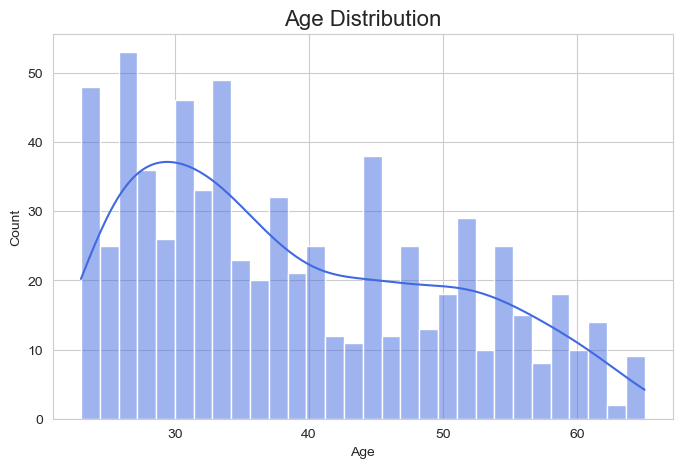

In [85]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', kde=True, color='royalblue', bins=30)

plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
# How many individuals report good health vs poor health?

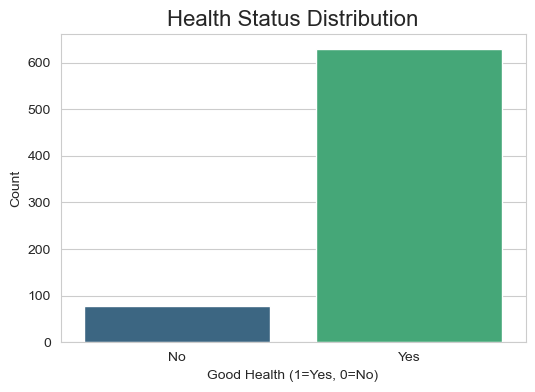

In [86]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='good_health', palette='viridis')

plt.title('Health Status Distribution', fontsize=16)
plt.xlabel('Good Health (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

In [ ]:
# What is the distribution of total leisure time?

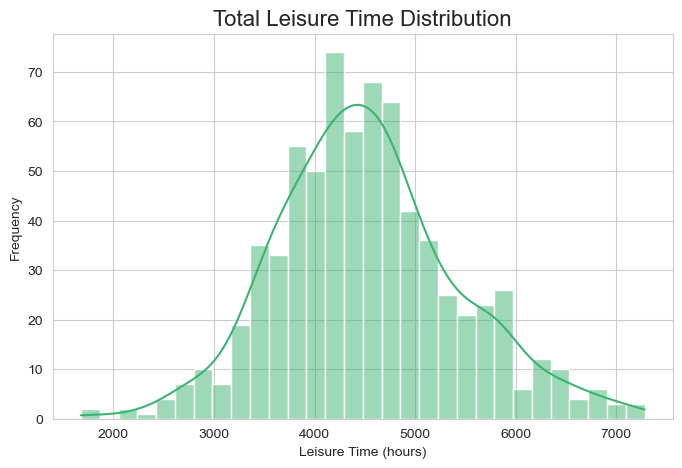

In [87]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='total_leisure_time', kde=True, color='mediumseagreen', bins=30)

plt.title('Total Leisure Time Distribution', fontsize=16)
plt.xlabel('Leisure Time (hours)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# What is the average amount of sleep hours (sleep)?

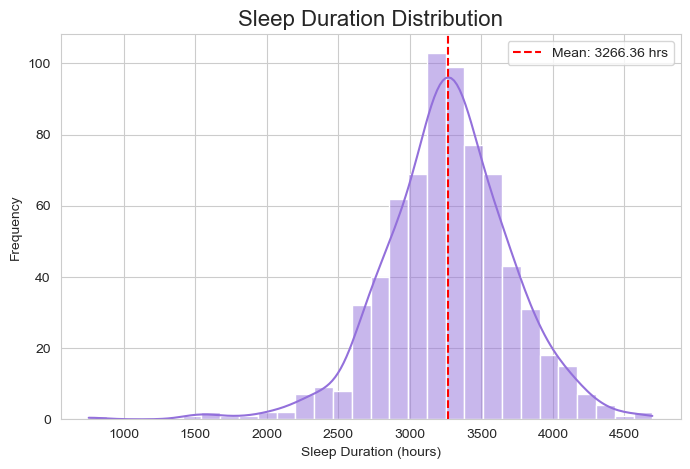

In [88]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='sleep', kde=True, color='mediumpurple', bins=30)

plt.axvline(df['sleep'].mean(), color='red', linestyle='--', label=f"Mean: {df['sleep'].mean():.2f} hrs")

plt.title('Sleep Duration Distribution', fontsize=16)
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# What is the distribution of hourly_wage and log_hr_wage?

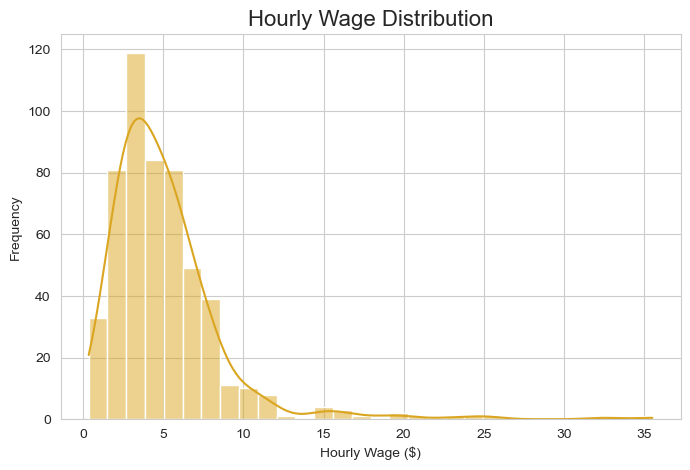

In [89]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='hourly_wage', kde=True, color='goldenrod', bins=30)

plt.title('Hourly Wage Distribution', fontsize=16)
plt.xlabel('Hourly Wage ($)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# How is marital status distributed (Married, Single, etc.)?

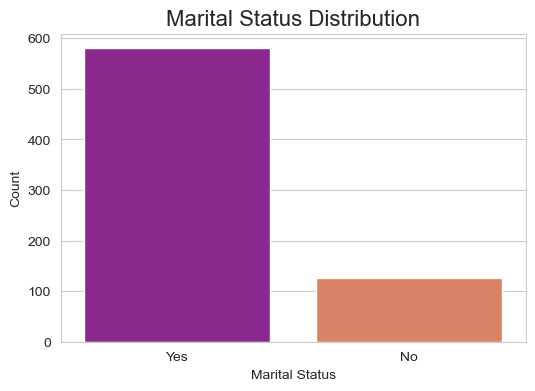

In [90]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Marital_status', palette='plasma')

plt.title('Marital Status Distribution', fontsize=16)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [ ]:
# What percentage are male vs female?

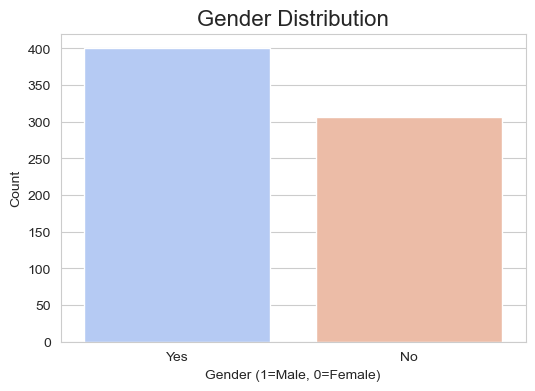

In [91]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='male', palette='coolwarm')

plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender (1=Male, 0=Female)')
plt.ylabel('Count')
plt.show()

In [ ]:
# How many individuals have young kids (young_kid)?

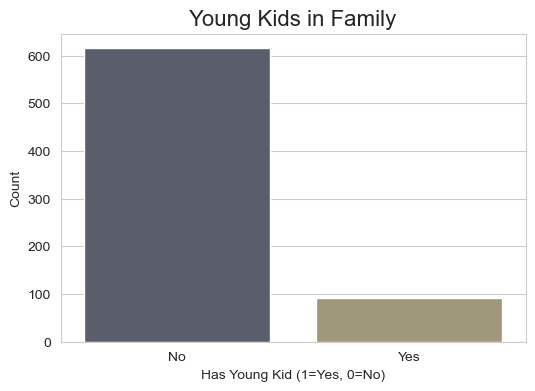

In [92]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='young_kid', palette='cividis')

plt.title('Young Kids in Family', fontsize=16)
plt.xlabel('Has Young Kid (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

In [ ]:
# How many people work in clerical, construction, etc.?

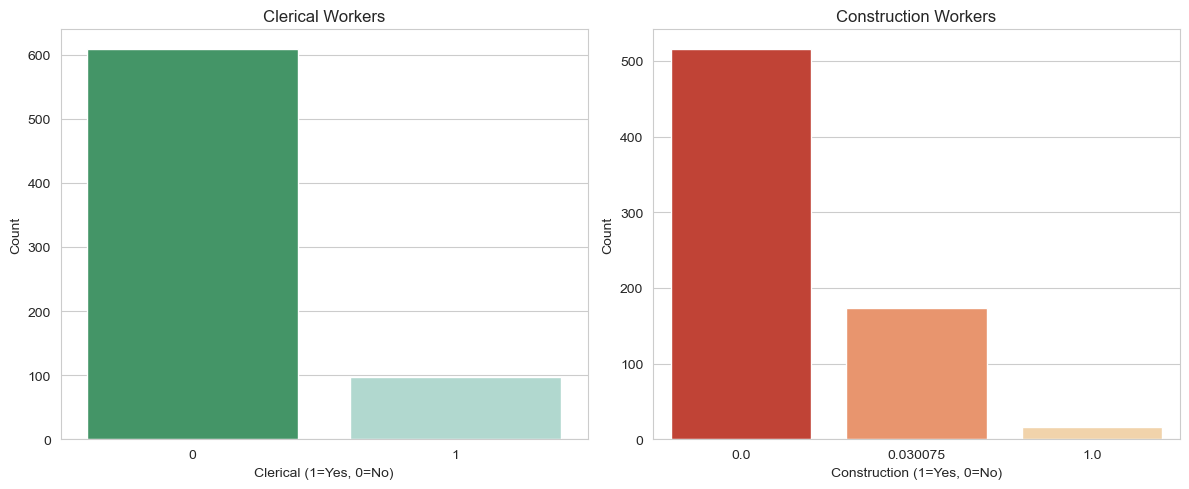

In [93]:
# Let's assume clerical and construc are binary 1/0 columns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df, x='clerical', palette='BuGn_r', ax=axes[0])
axes[0].set_title('Clerical Workers')
axes[0].set_xlabel('Clerical (1=Yes, 0=No)')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='construc', palette='OrRd_r', ax=axes[1])
axes[1].set_title('Construction Workers')
axes[1].set_xlabel('Construction (1=Yes, 0=No)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

*Bivariate Analysis (Two Column Relationship Analysis)*

In [ ]:
# Does age affect sleep duration?

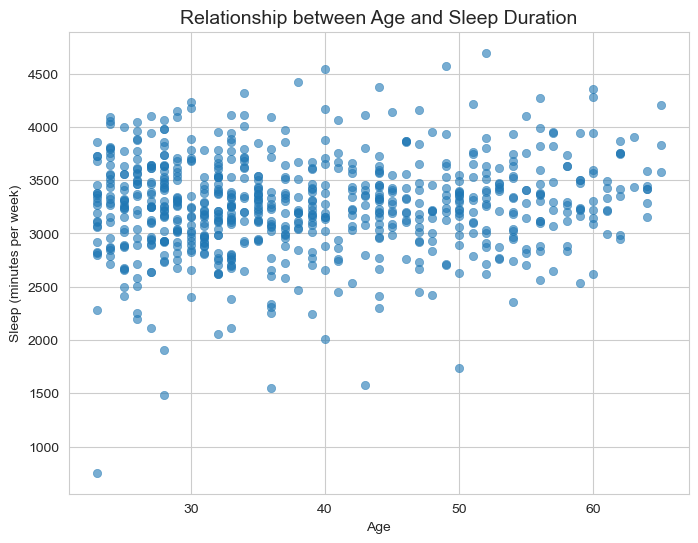

In [96]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='sleep', data=df, palette='coolwarm', alpha=0.6, edgecolor=None)
plt.title('Relationship between Age and Sleep Duration', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Sleep (minutes per week)')
plt.grid(True)
plt.show()

In [ ]:
# Is there a difference in sleep time between males and females?

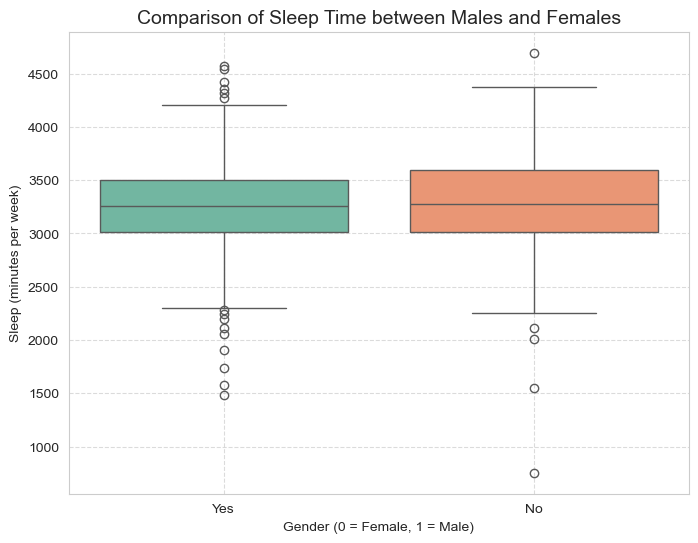

In [97]:
plt.figure(figsize=(8,6))
sns.boxplot(x='male', y='sleep', data=df, palette='Set2')
plt.title('Comparison of Sleep Time between Males and Females', fontsize=14)
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Sleep (minutes per week)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Does good_health status influence total leisure time?

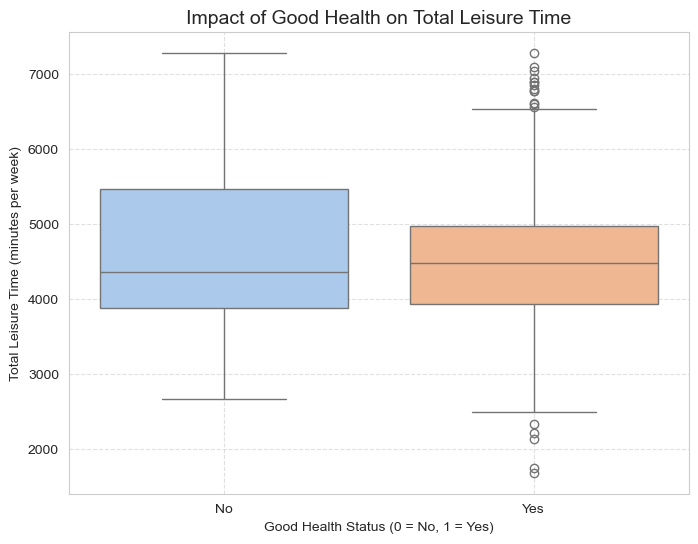

In [99]:
plt.figure(figsize=(8,6))
sns.boxplot(x='good_health', y='total_leisure_time', data=df, palette='pastel')
plt.title('Impact of Good Health on Total Leisure Time', fontsize=14)
plt.xlabel('Good Health Status (0 = No, 1 = Yes)')
plt.ylabel('Total Leisure Time (minutes per week)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# How does marital status relate to sleep duration?

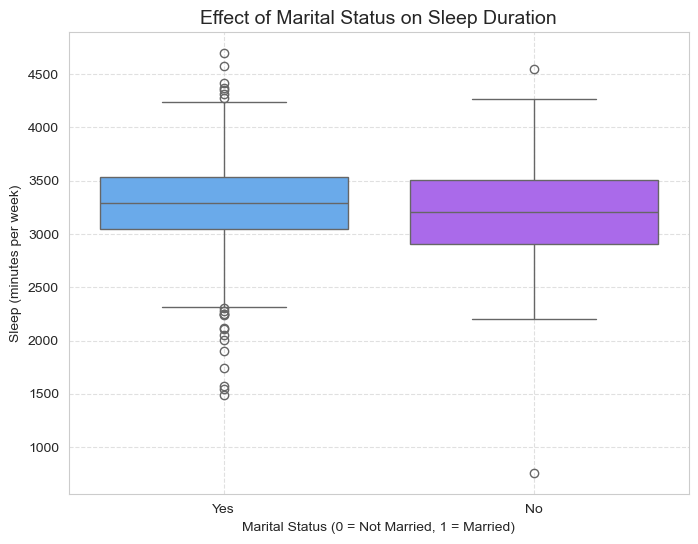

In [101]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Marital_status', y='sleep', data=df, palette='cool')
plt.title('Effect of Marital Status on Sleep Duration', fontsize=14)
plt.xlabel('Marital Status (0 = Not Married, 1 = Married)')
plt.ylabel('Sleep (minutes per week)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Does education level impact hourly_wage?

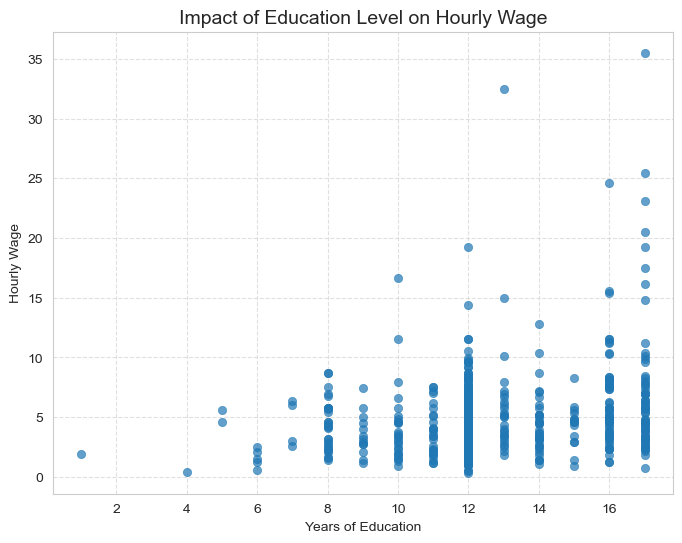

In [103]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='education', y='hourly_wage', data=df, palette='viridis', alpha=0.7, edgecolor=None)
plt.title('Impact of Education Level on Hourly Wage', fontsize=14)
plt.xlabel('Years of Education')
plt.ylabel('Hourly Wage')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Is there a correlation between experience and total work hours (totwrk_hr)?

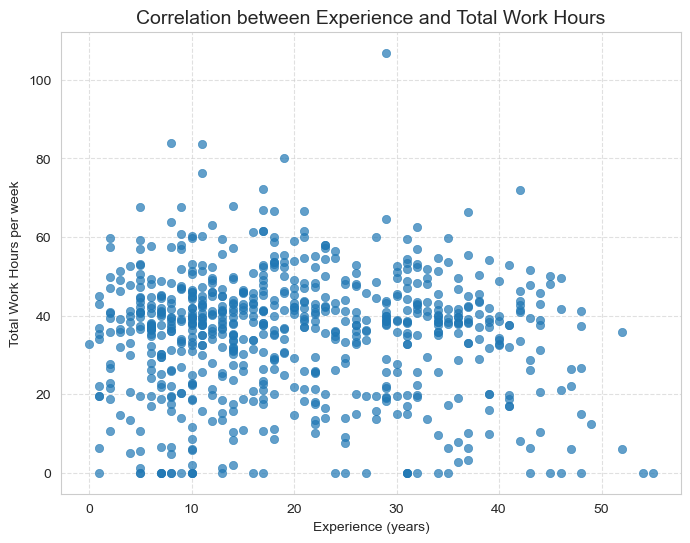

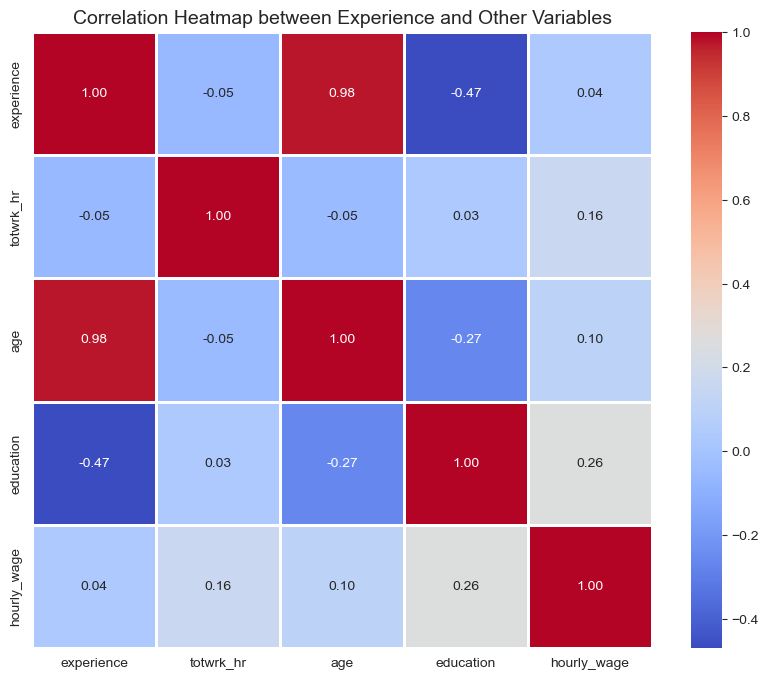

In [105]:
 # Scatter plot for experience vs total work hours
plt.figure(figsize=(8,6))
sns.scatterplot(x='experience', y='totwrk_hr', data=df, palette='magma', alpha=0.7, edgecolor=None)
plt.title('Correlation between Experience and Total Work Hours', fontsize=14)
plt.xlabel('Experience (years)')
plt.ylabel('Total Work Hours per week')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Correlation heatmap for all numerical variables
plt.figure(figsize=(10,8))
corr = df[['experience', 'totwrk_hr', 'age', 'education', 'hourly_wage']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='white')
plt.title('Correlation Heatmap between Experience and Other Variables', fontsize=14)
plt.show()


In [ ]:
# Do people in union jobs earn higher hourly_wages?

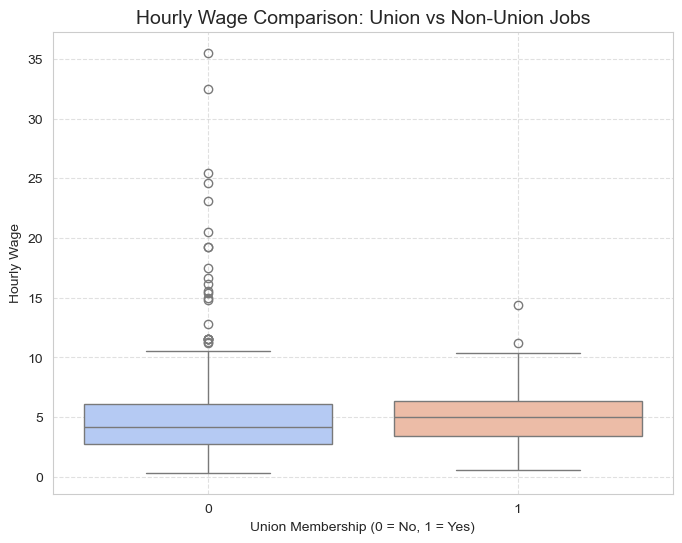

In [106]:
plt.figure(figsize=(8,6))
sns.boxplot(x='union', y='hourly_wage', data=df, palette='coolwarm')
plt.title('Hourly Wage Comparison: Union vs Non-Union Jobs', fontsize=14)
plt.xlabel('Union Membership (0 = No, 1 = Yes)')
plt.ylabel('Hourly Wage')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# How does having a young kid affect sleep duration?

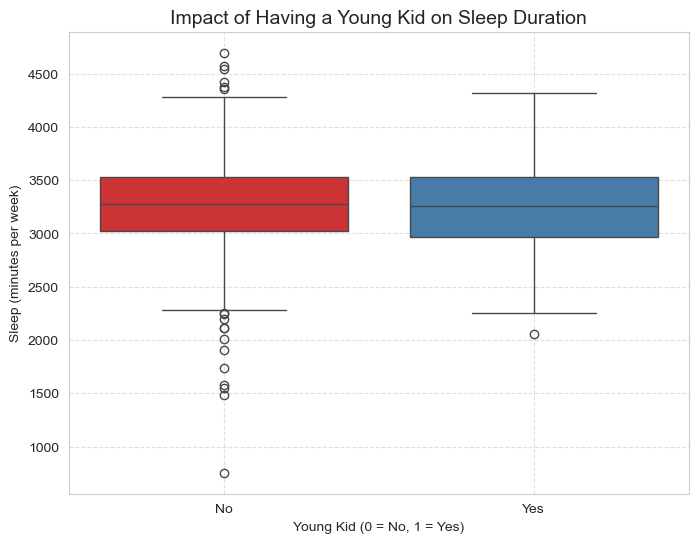

In [107]:
plt.figure(figsize=(8,6))
sns.boxplot(x='young_kid', y='sleep', data=df, palette='Set1')
plt.title('Impact of Having a Young Kid on Sleep Duration', fontsize=14)
plt.xlabel('Young Kid (0 = No, 1 = Yes)')
plt.ylabel('Sleep (minutes per week)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Does working a second job (Worked_second) impact sleep?

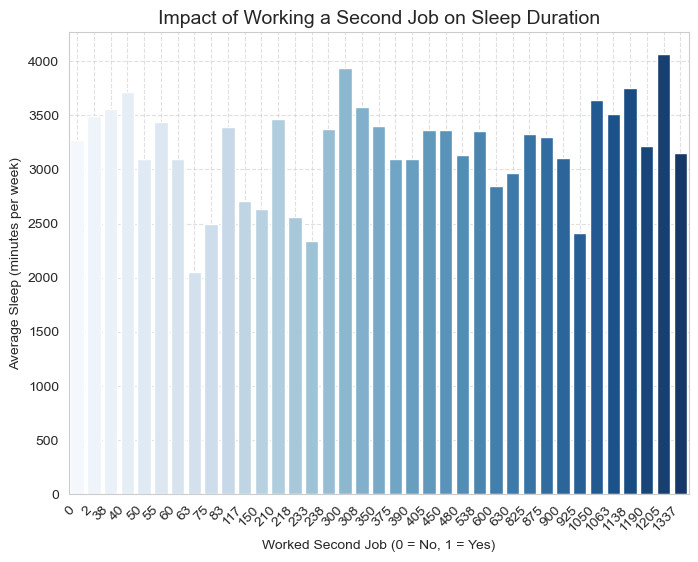

In [111]:
plt.figure(figsize=(8,6))

# Bar plot to compare mean sleep duration for those who work a second job vs. those who don't
sns.barplot(x='Worked_second', y='sleep', data=df, palette='Blues', ci=None)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.title('Impact of Working a Second Job on Sleep Duration', fontsize=14)
plt.xlabel('Worked Second Job (0 = No, 1 = Yes)')
plt.ylabel('Average Sleep (minutes per week)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

*Multivariate Analysis (Multtliple Columns Together)*

In [ ]:
# How does age, gender, and marital status together impact sleep duration?

ValueError: Could not interpret value `age_group` for `hue`. Value is a string, but `data` was not passed.

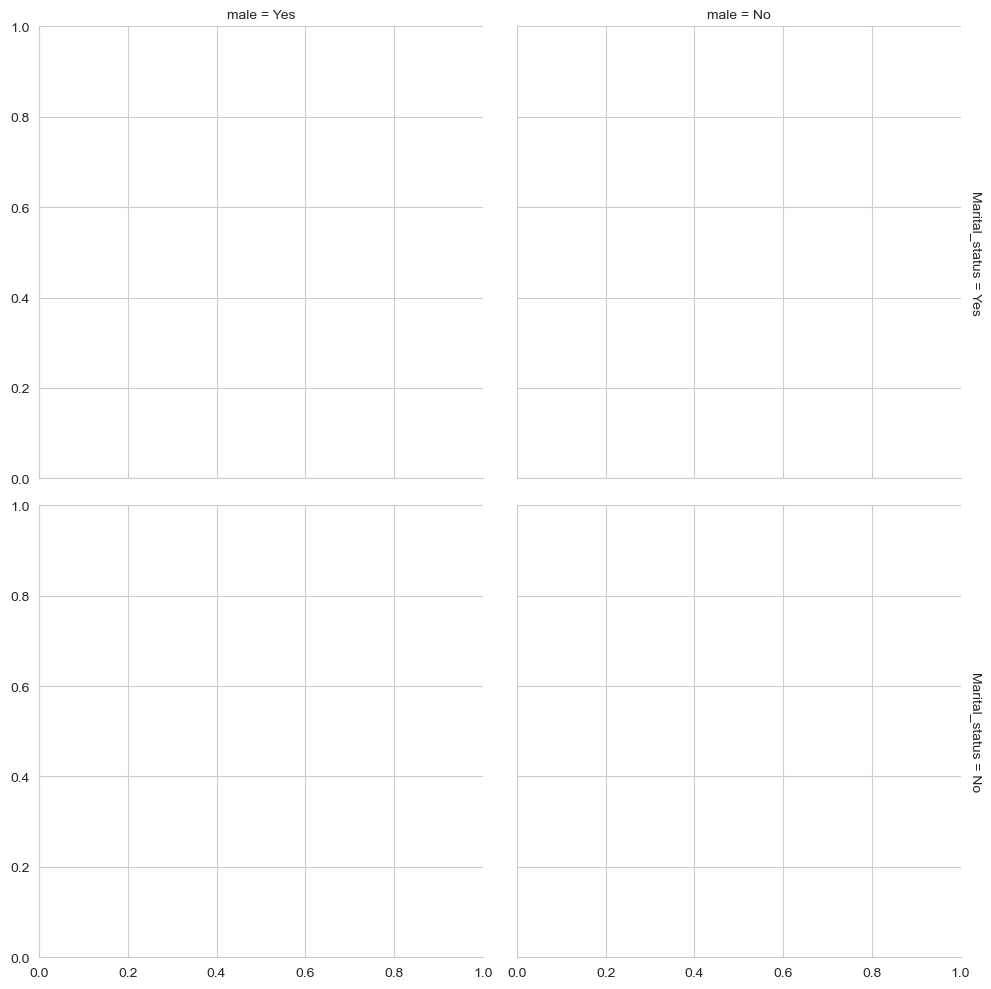

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create an age group column to better visualize the relationship with age
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80], 
                         labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

# Set up a grid to visualize the impact of age, male (gender), and marital status on sleep duration
g = sns.FacetGrid(df, col="male", row="Marital_status", margin_titles=True, height=5)

# Explicitly pass the data and hue
g.map(sns.scatterplot, 'age', 'sleep', alpha=0.6, hue='age_group', palette='coolwarm', legend=True)

# Adjust labels, title, and other formatting
g.set_axis_labels("Age", "Sleep (minutes per week)")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
plt.subplots_adjust(top=0.9)  # Adjust the title spacing
g.fig.suptitle("Impact of Age, Gender (Male), and Marital Status on Sleep Duration", fontsize=16)

# Handle the hue legend
g.add_legend(title="Age Group")

plt.show()


In [ ]:
# What is the combined effect of experience and education on hourly wage?

In [ ]:
# How do health status, leisure time, and work hours together impact sleep?

In [ ]:
# How does spouse working (spouse_works) and spouse income affect individual's sleep and work hours?

In [ ]:
# Is there a difference in sleep patterns across regions (south, smsa)?